<a href="https://colab.research.google.com/github/stellazhu31/Election-Data-Analysis-Personal-Project/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, plot_confusion_matrix

In [3]:
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [4]:
from google.colab import files
uploaded = files.upload()

Saving ebayAuctions.xlsx to ebayAuctions.xlsx


In [5]:
df=pd.read_excel("ebayAuctions.xlsx",   sheet_name='eBay auctions', header=0)

In [43]:
#no missing values found
df.isna().sum()

Category        0
Currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [44]:
#Competitive vs. Category, currency, sellerRating, duration, openpPrice 
df2 = df[["Competitive?","Category","sellerRating", "Duration","Currency","OpenPrice"]]

In [45]:
df2.head()

,Competitive?,Category,sellerRating,Duration,Currency,OpenPrice
0,0,Music/Movie/Game,3249,5,US,0.01
1,0,Music/Movie/Game,3249,5,US,0.01
2,0,Music/Movie/Game,3249,5,US,0.01
3,0,Music/Movie/Game,3249,5,US,0.01
4,0,Music/Movie/Game,3249,5,US,0.01


In [46]:
#one hot encoding categorical variables
dummy_vars = ['Category', 'Currency','Duration']
df_tree = pd.get_dummies(df2,prefix=dummy_vars, columns=dummy_vars)

In [47]:
df_tree.columns

Index(['Competitive?', 'sellerRating', 'OpenPrice',
       'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books',
       'Category_Business/Industrial', 'Category_Clothing/Accessories',
       'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry',
       'Category_Music/Movie/Game', 'Category_Photography',
       'Category_Pottery/Glass', 'Category_SportingGoods',
       'Category_Toys/Hobbies', 'Currency_EUR', 'Currency_GBP', 'Currency_US',
       'Duration_1', 'Duration_3', 'Duration_5', 'Duration_7', 'Duration_10'],
      dtype='object')

In [52]:
df_tree.head(5)

,Competitive?,sellerRating,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies,Currency_EUR,Currency_GBP,Currency_US,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,0,3249,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,0,3249,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,3249,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,3249,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,0,3249,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [53]:
# train test split
x = df_tree.loc[:,df_tree.columns != 'Competitive?']
y = df_tree.loc[:,df_tree.columns == 'Competitive?']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=7)

In [54]:
# build dt model with min split = 50
# cross validate?
np.random.seed(42)
model2 = DecisionTreeClassifier(min_samples_split=50, random_state=7)
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [55]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       372
           1       0.72      0.70      0.71       417

    accuracy                           0.70       789
   macro avg       0.70      0.70      0.70       789
weighted avg       0.70      0.70      0.70       789



In [57]:
y_pred = model2.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[246, 126],
       [ 97, 320]])

In [58]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7173637515842839


In [89]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[246, 126],
       [ 97, 320]])

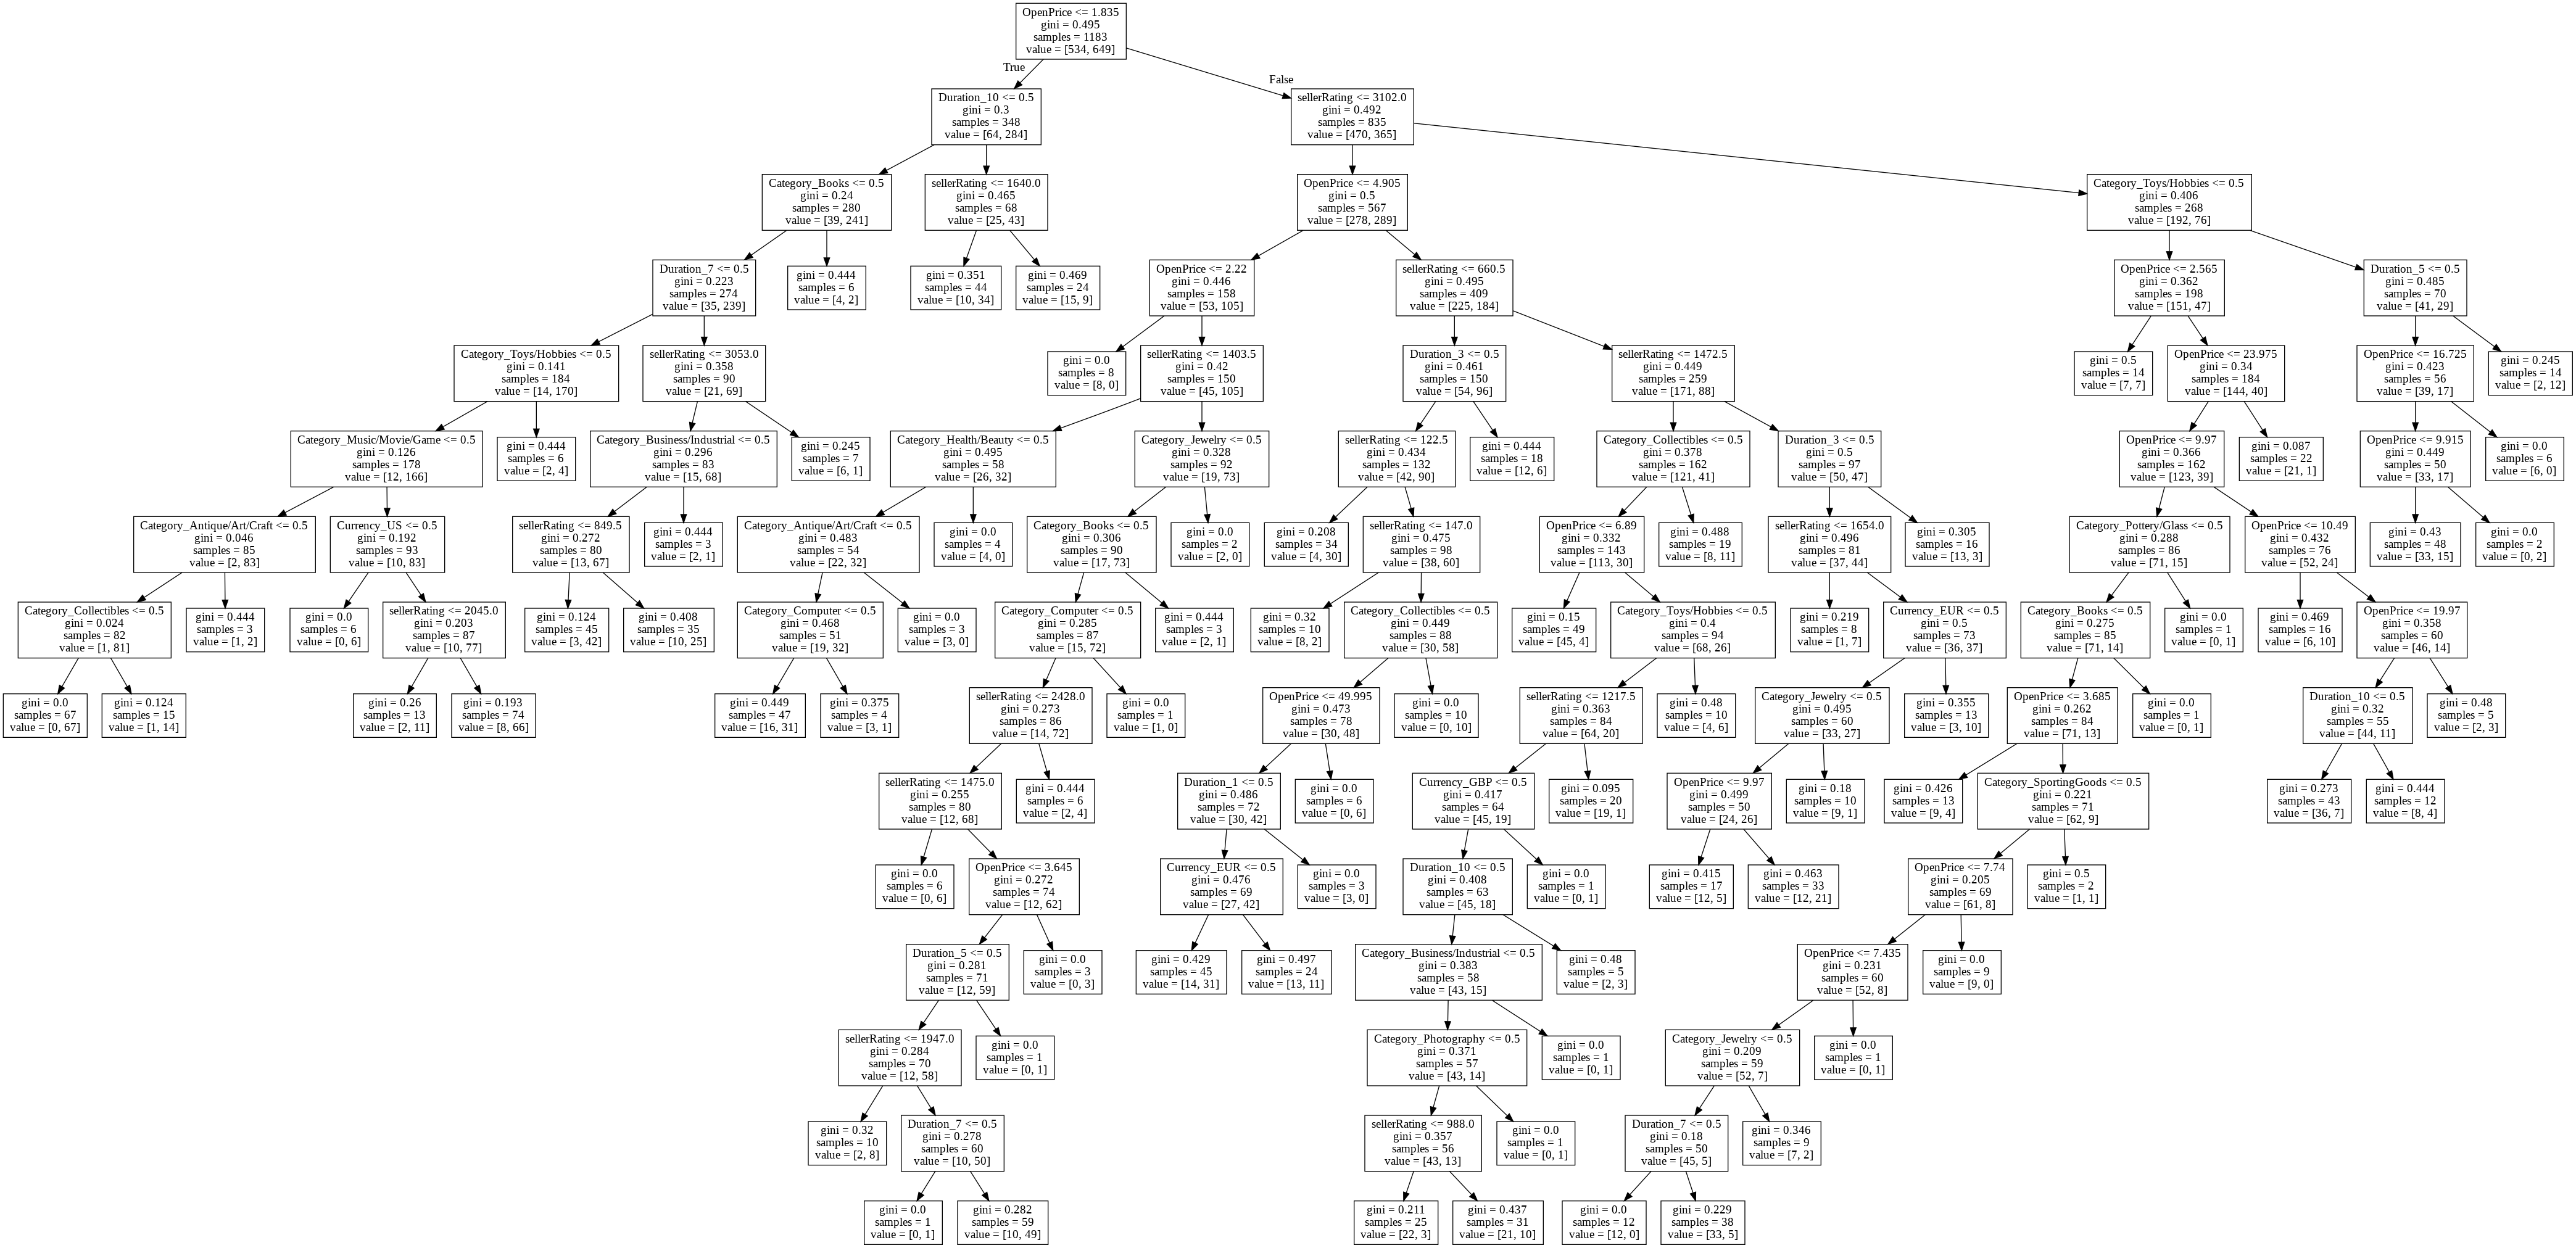

In [94]:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data, feature_names = x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('auctionTree2.png')
Image(graph.create_png())

In [ ]:
# print out rules 
r = export_text(dt2, feature_names=x_train.columns.values.tolist())
print(r)

### Select Top Predictors

In [65]:
predictor_importance = model2.feature_importances_
predictor_importance

array([0.28218146, 0.43646941, 0.01104457, 0.        , 0.02436925,
       0.01010986, 0.        , 0.        , 0.02852064, 0.01024237,
       0.        , 0.        , 0.01021543, 0.        , 0.02242703,
       0.00244756, 0.00452473, 0.00538664, 0.00223941, 0.0249917 ,
       0.01500446, 0.00392304, 0.00057925, 0.00832064, 0.02823108,
       0.02703551, 0.01312719, 0.02860876])

In [174]:
imp_table = np.column_stack([x_train.columns, np.round(predictor_importance,4)])
imp_table 

array([['sellerRating', 0.2822],
       ['OpenPrice', 0.4365],
       ['Category_Antique/Art/Craft', 0.011],
       ['Category_Automotive', 0.0],
       ['Category_Books', 0.0244],
       ['Category_Business/Industrial', 0.0101],
       ['Category_Clothing/Accessories', 0.0],
       ['Category_Coins/Stamps', 0.0],
       ['Category_Collectibles', 0.0285],
       ['Category_Computer', 0.0102],
       ['Category_Electronics', 0.0],
       ['Category_EverythingElse', 0.0],
       ['Category_Health/Beauty', 0.0102],
       ['Category_Home/Garden', 0.0],
       ['Category_Jewelry', 0.0224],
       ['Category_Music/Movie/Game', 0.0024],
       ['Category_Photography', 0.0045],
       ['Category_Pottery/Glass', 0.0054],
       ['Category_SportingGoods', 0.0022],
       ['Category_Toys/Hobbies', 0.025],
       ['Currency_EUR', 0.015],
       ['Currency_GBP', 0.0039],
       ['Currency_US', 0.0006],
       ['Duration_1', 0.0083],
       ['Duration_3', 0.0282],
       ['Duration_5', 0.027],
    

In [175]:
imp_table = pd.DataFrame(imp_table,columns=["Variable","Importance"])
imp_table

,Variable,Importance
0,sellerRating,0.2822
1,OpenPrice,0.4365
2,Category_Antique/Art/Craft,0.011
3,Category_Automotive,0
4,Category_Books,0.0244
5,Category_Business/Industrial,0.0101
6,Category_Clothing/Accessories,0
7,Category_Coins/Stamps,0
8,Category_Collectibles,0.0285
9,Category_Computer,0.0102


In [177]:
#Select top 5 predictors
n=5
imp_table.sort_values(["Importance"], ascending=False).iloc[:n,:]

,Variable,Importance
1,OpenPrice,0.4365
0,sellerRating,0.2822
27,Duration_10,0.0286
8,Category_Collectibles,0.0285
24,Duration_3,0.0282


In [87]:
#Build tree with selected predictors:
model_predictors = ["OpenPrice", "sellerRating","Duration_10","Category_Collectibles", "Duration_3"]
np.random.seed(42)
model3 = DecisionTreeClassifier(min_samples_leaf=50)
x_train_new = x_train[model_predictors]
model3.fit(x_train_new,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
#confusion matrix
x_test_new = x_test[model_predictors]
y_pred3 = model3.predict(x_test_new)
confusion_matrix(y_test,y_pred3)

array([[267, 105],
       [107, 310]])

In [92]:
print("Accuracy:", accuracy_score(y_test,y_pred3))

Accuracy: 0.7313054499366286


In [93]:
# classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       372
           1       0.75      0.74      0.75       417

    accuracy                           0.73       789
   macro avg       0.73      0.73      0.73       789
weighted avg       0.73      0.73      0.73       789



In [167]:
#precision TP / (TP + FP)
precision_score(y_test, y_pred3)

0.7469879518072289

In [168]:
#Recall (Sensitivity) TP / (TP + FN) 
recall_score(y_test, y_pred3)

0.7434052757793765

In [169]:
# f1 score TP/(TP + 0.5(FN+FP))
f1_score(y_test, y_pred3)

0.7451923076923077

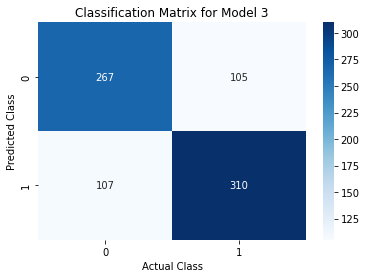

In [165]:
classification_matrix= confusion_matrix(y_test, y_pred3)
sns.heatmap(classification_matrix,annot=True, cmap='Blues', fmt='g')
plt.title('Classification Matrix for Model 3')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show() 

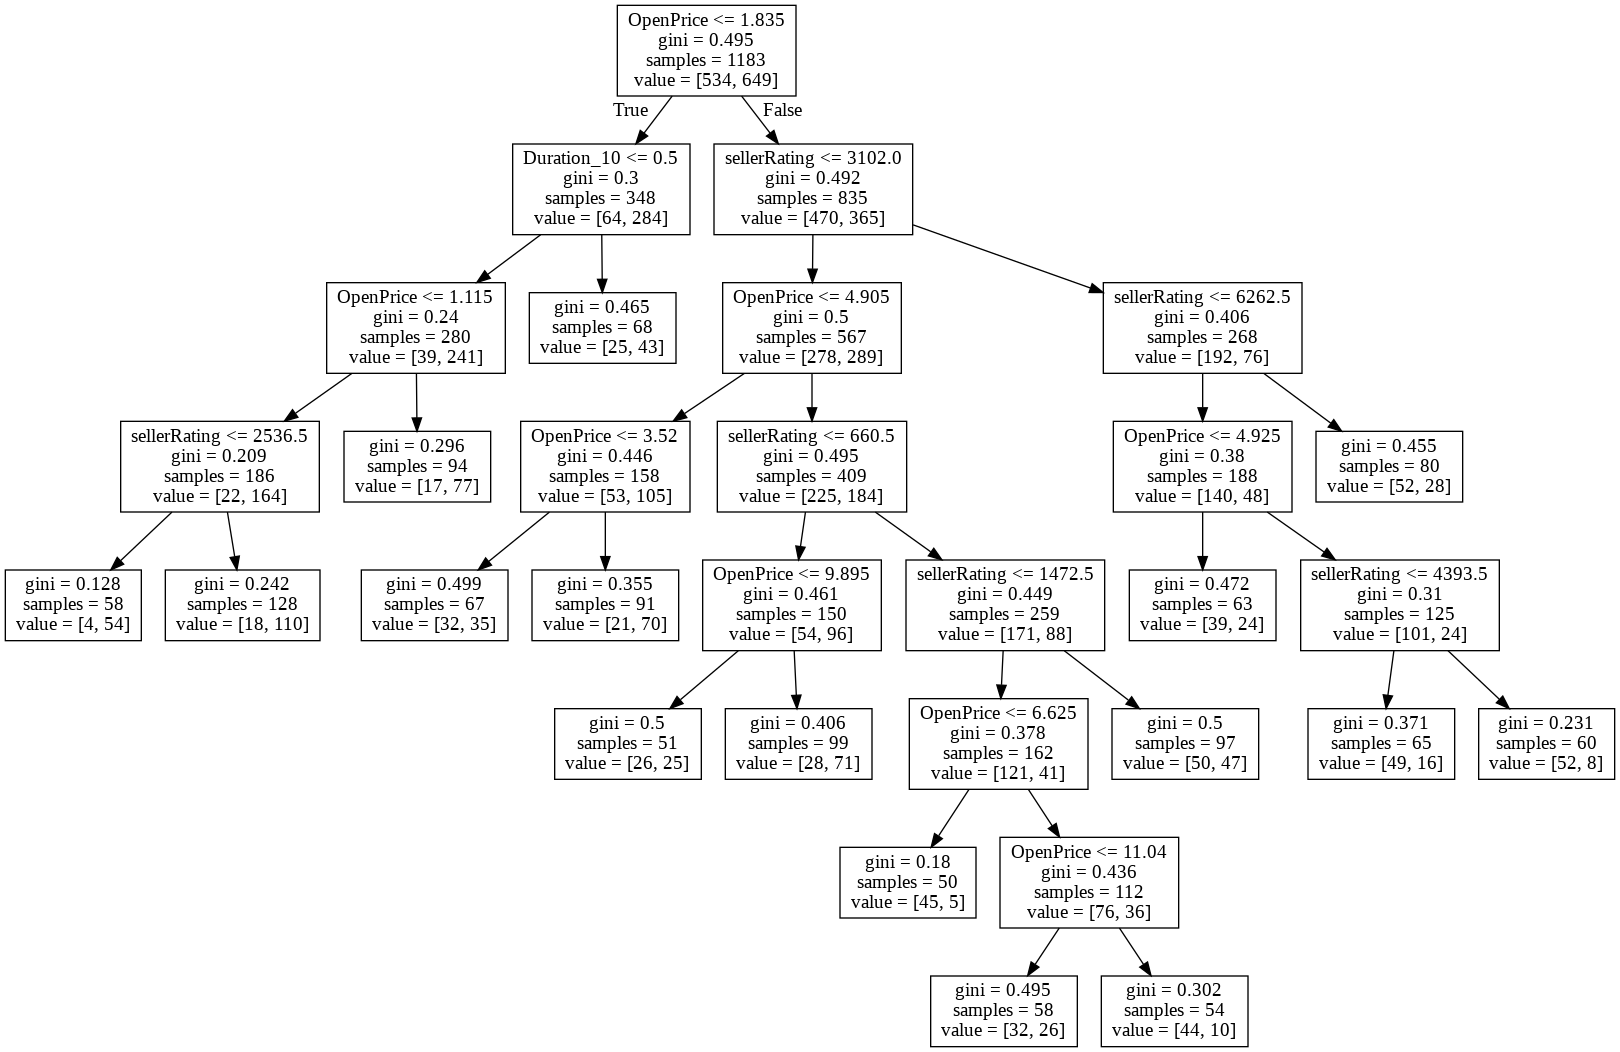

In [120]:
dot_data = StringIO()
export_graphviz(model3, out_file=dot_data, feature_names = x_train_new.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('auctionTree2.png')
Image(graph.create_png())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


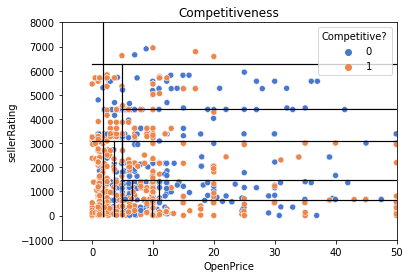

In [178]:
ylim = 8000
xlim = 50
scatter=sns.scatterplot('OpenPrice', 'sellerRating', hue='Competitive?', palette='muted', data=df_tree)
scatter.set_xlim(left=-5, right=50)
scatter.set_ylim(bottom=-1000, top=8000);
plt.title('Competitiveness')
plt.plot([1.805, 1.805],[0, ylim],  c="black", linewidth=lwd)
plt.plot([0, xlim],[3102.0, 3102.0],  c="black", linewidth=lwd)
plt.plot([4.905, 4.905],[0, 3102.0],  c="black", linewidth=lwd)
plt.plot([3.52, 3.52],[0, 3102.0],  c="black", linewidth=lwd)
plt.plot([4.95,xlim],[660.5, 660.5],  c="black", linewidth=lwd)
plt.plot([9.895, 9.895],[0, 660.5],  c="black", linewidth=lwd)
plt.plot([4.95,xlim],[1472.5,1472.5],  c="black", linewidth=lwd)
plt.plot([6.625, 6.625],[660.5,1472.5],  c="black", linewidth=lwd)
plt.plot([11.04, 11.04],[660.5,1472.5],  c="black", linewidth=lwd)

plt.plot([0, xlim],[6262.5, 6262.5],  c="black", linewidth=lwd)
plt.plot([4.905, 4.905],[0, 6262.5],  c="black", linewidth=lwd)
plt.plot([4.905, xlim],[4393.5, 4394.5],  c="black", linewidth=lwd)



In [166]:
print("Accuracy:",accuracy_score(y_test, y_pred3))

Accuracy: 0.7313054499366286


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [ ]:
plt.plot(x, y, 'o', color='black');